In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv(r"C:\Users\Asus\Desktop\projects\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv", index_col=0)

In [6]:
df

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
index,,,,,,,,,,,,
1,2017,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
2,2017,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
3,2017,1,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
4,2017,1,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
5,2017,1,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58150,2019,9,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,67 years 10 months,543888.0
58151,2019,9,YISHUN,EXECUTIVE,640A,YISHUN ST 61,01 TO 03,164.0,Apartment,1992,71 years 09 months,695888.0
58152,2019,9,YISHUN,EXECUTIVE,636A,YISHUN ST 61,01 TO 03,164.0,Apartment,1992,71 years 09 months,745000.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.sample(10)

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
index,,,,,,,,,,,,
27484,2018,5,SENGKANG,4 ROOM,309C,ANCHORVALE RD,04 TO 06,93.0,Premium Apartment,2002,83 years 06 months,362000.0
10143,2017,7,CHOA CHU KANG,4 ROOM,423,CHOA CHU KANG AVE 4,10 TO 12,104.0,Model A,1992,74 years,373000.0
17572,2017,11,JURONG EAST,4 ROOM,282,TOH GUAN RD,10 TO 12,91.0,Model A2,1998,80 years,480000.0
35401,2018,9,HOUGANG,EXECUTIVE,851,HOUGANG CTRL,01 TO 03,138.0,Apartment,1997,77 years 05 months,808000.0
32299,2018,7,WOODLANDS,4 ROOM,627,WOODLANDS AVE 6,10 TO 12,90.0,Model A2,1998,79 years 01 month,312000.0
37469,2018,10,JURONG WEST,4 ROOM,276A,JURONG WEST ST 25,07 TO 09,85.0,Model A2,2002,82 years 04 months,319888.0
30797,2018,7,CLEMENTI,4 ROOM,703,WEST COAST RD,10 TO 12,93.0,New Generation,1980,61 years 03 months,425000.0
4668,2017,4,CHOA CHU KANG,5 ROOM,343,CHOA CHU KANG LOOP,10 TO 12,133.0,Model A,1993,75 years 02 months,570000.0
56541,2019,9,BUKIT BATOK,3 ROOM,258,BT BATOK EAST AVE 4,04 TO 06,73.0,Model A,1985,64 years 06 months,248000.0


In [9]:
df.shape

(58154, 12)

In [10]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [11]:
df.town.nunique()

26

In [12]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [13]:
df["resale_price"].head()

index
1    232000.0
2    250000.0
3    262000.0
4    265000.0
5    265000.0
Name: resale_price, dtype: float64

In [14]:
df.isnull().any()

year                   False
month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

Box plot of resale price across different towns

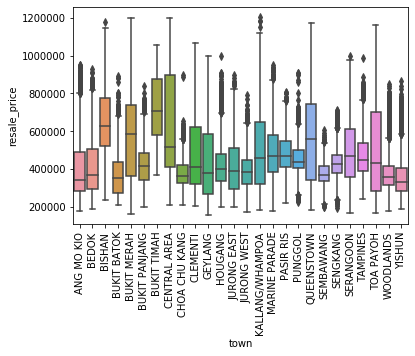

In [15]:
chart=sns.boxplot(y='resale_price', x='town', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [16]:
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

Boxplot of resale price vs flat type

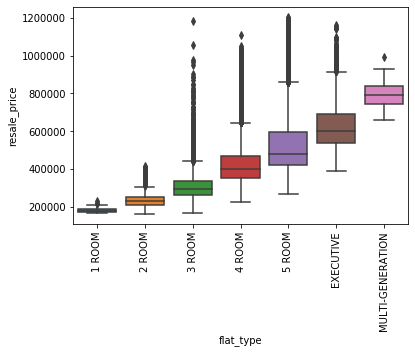

In [17]:
chart=sns.boxplot(y='resale_price', x='flat_type',order=['1 ROOM' , '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'], data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [18]:
df.flat_model.unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft'], dtype=object)

Boxplot of resale price vs flat model

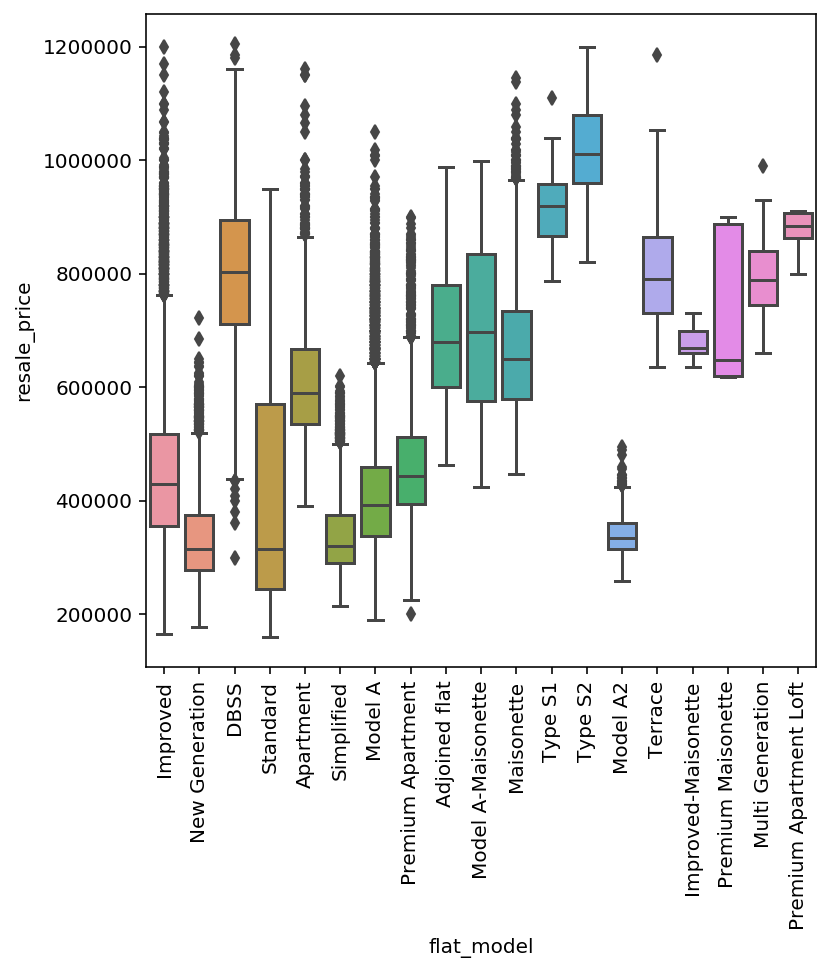

In [43]:
chart=sns.boxplot(y='resale_price', x='flat_model', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [20]:
df.storey_range.unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

Boxplot of resale price vs storey_range

[]

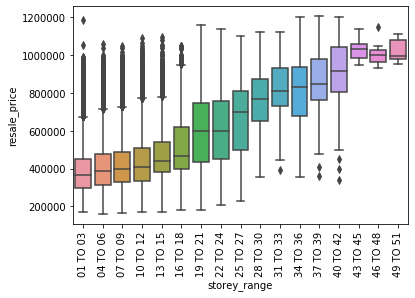

In [21]:
chart=sns.boxplot(y='resale_price', x='storey_range', order=['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15','16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42','43 TO 45','46 TO 48','49 TO 51'], data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.plot()

Linear regression model to predict resale price(y) given square metre area(X)

In [22]:
y=df['resale_price']

In [23]:
X=df[['floor_area_sqm']]

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=7)

In [25]:
model=LinearRegression()

In [26]:
y_train.shape

(40707,)

In [27]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.score(X_train, y_train)

0.39835345214466716

In [29]:
model.score(X_test, y_test)

0.40314736371255805

In [30]:
predict_train=model.predict(X_train)

In [31]:
predict_test=model.predict(X_test)

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, predict_train))

119848.07670927786

In [34]:
np.sqrt(mean_squared_error(y_test, predict_test))

118677.3225749711

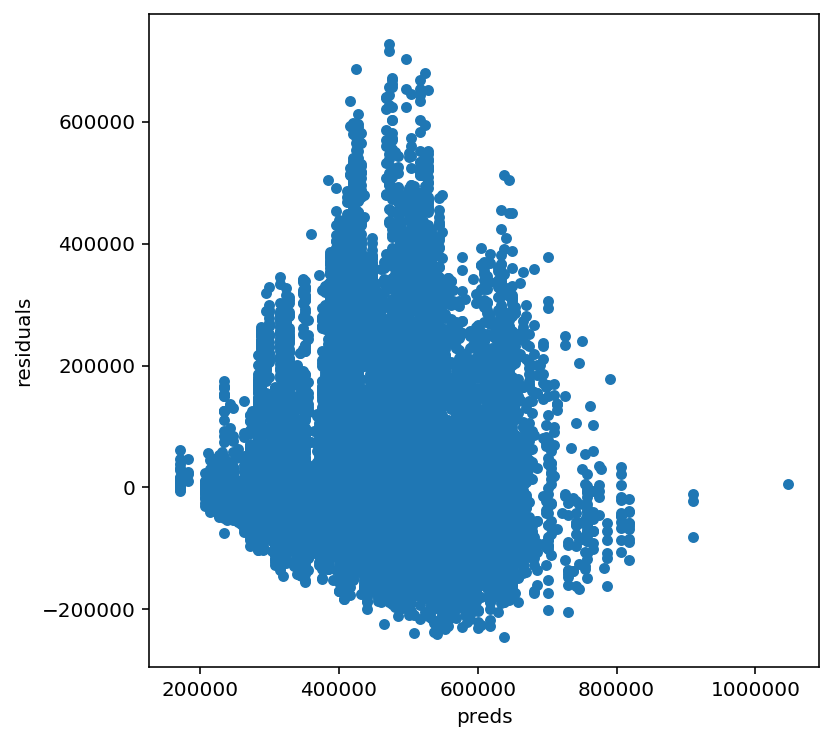

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format ='retina'

%matplotlib inline

matplotlib.rcParams['figure.figsize']=(6.0, 6.0)

preds =pd.DataFrame({"preds": predict_train, "true":y_train})
preds["residuals"]=preds["true"]-preds["preds"]

preds.plot(x="preds", y="residuals", kind="scatter")

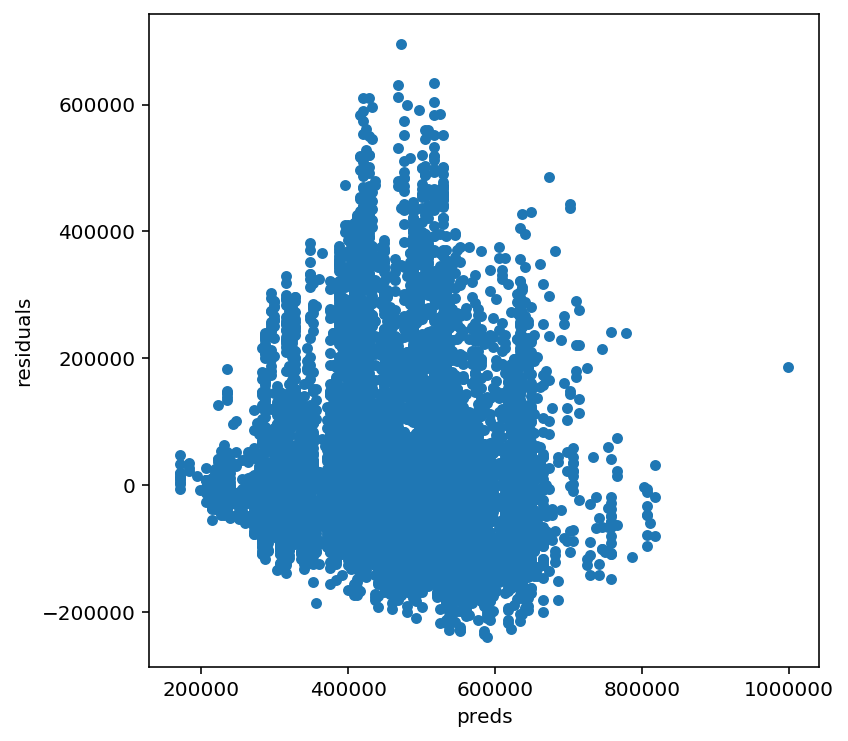

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format ='retina'

%matplotlib inline

matplotlib.rcParams['figure.figsize']=(6.0, 6.0)

preds =pd.DataFrame({"preds": predict_test, "true":y_test})
preds["residuals"]=preds["true"]-preds["preds"]

preds.plot(x="preds", y="residuals", kind="scatter")

In [37]:
model.coef_

array([4021.60482995])

In [38]:
model.intercept_

46111.064071655506

In [39]:
import statsmodels.api as sm
from scipy import stats

In [40]:
df_new=sm.add_constant(X_train)

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
est=sm.OLS(y_train, df_new)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                 2.695e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:15:15   Log-Likelihood:            -5.3379e+05
No. Observations:               40707   AIC:                         1.068e+06
Df Residuals:                   40705   BIC:                         1.068e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.611e+04   2469.409     18.